In [27]:
#1) Завантажити дані, вивести назви колонок і розмір датасета

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


# Завантаження датасету
data = pd.read_csv('USA_cars_datasets.csv')

# Виведемо назви колонок
print("Назви колонок:")
print(data.columns)

# Виведемо розмір датасету
print("\nРозмір датасету:")
print(data.shape)


Назви колонок:
Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

Розмір датасету:
(2499, 13)


In [28]:
#2)Опрацювати пропуски (по можливості заповнити їх або видалити)

# Перевірка наявності пропусків
print("Перевірка на пропуски у даних:")
print(data.isnull().sum())

#Пропусків у даних не було виявлено, усі значення в датасеті є повними

Перевірка на пропуски у даних:
Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64


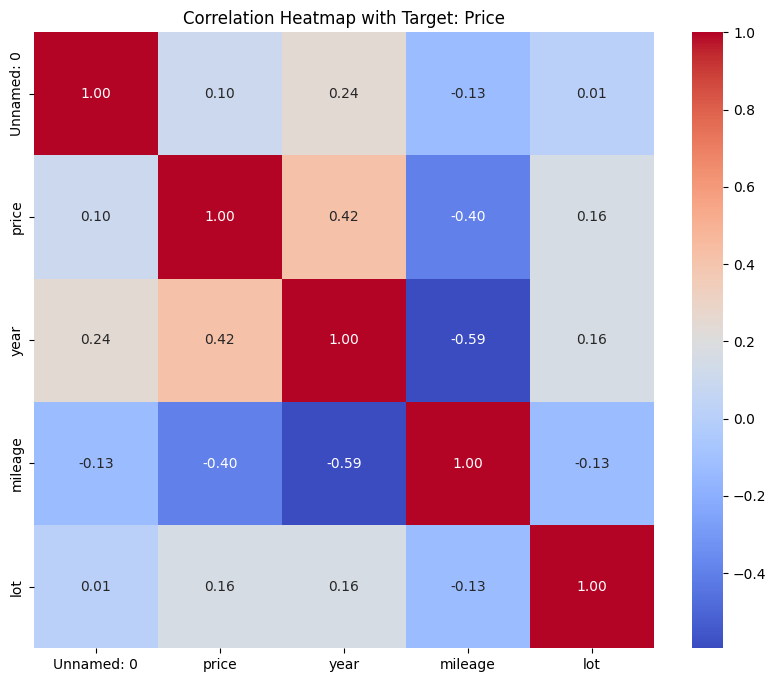

In [29]:
#3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
#ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
#розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
#обмежитися декількома)

#Візуалізація теплової карти для кореляційної матриці

#Вибір числових колонок для кореляційного аналізу
numeric_data = data.select_dtypes(include=['float64', 'int64'])

#Додавання цільової змінної "price" до числових ознак
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Target: Price')
plt.show()

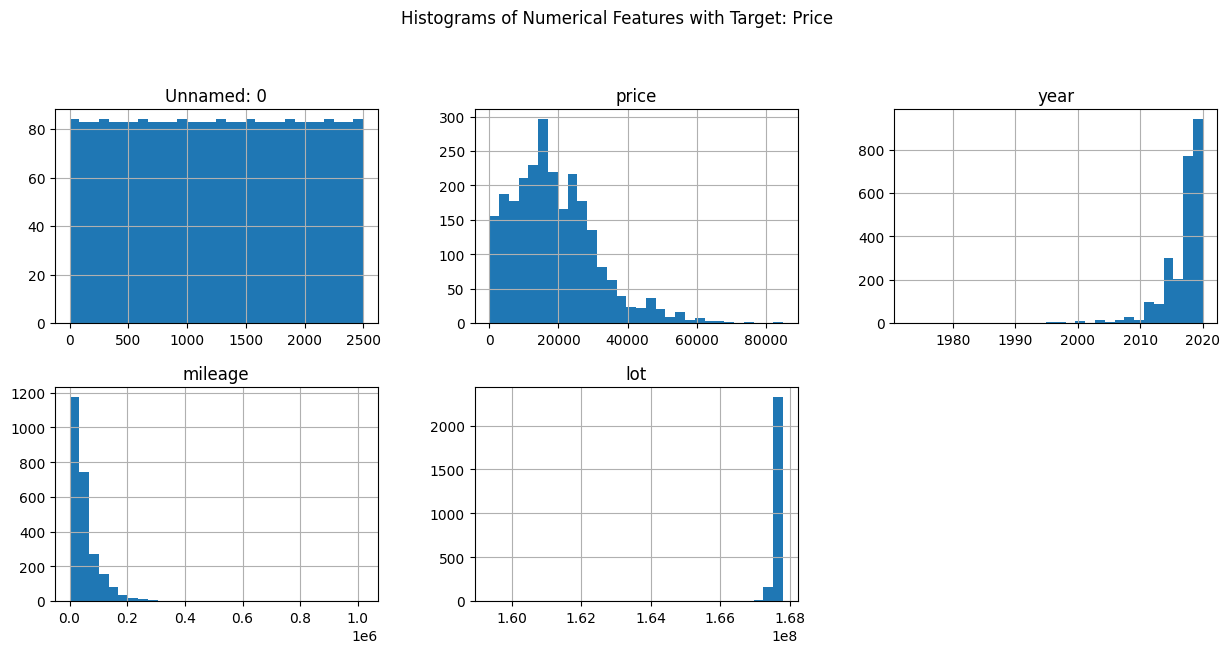

In [30]:
#Побудова гістограм для числових ознак
numeric_data.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features with Target: Price')
plt.show()

C:\Users\denis\AppData\Local\Temp\ipykernel_22784\1964860435.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['price'], palette='coolwarm')
C:\Users\denis\AppData\Local\Temp\ipykernel_22784\1964860435.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['price'], palette='coolwarm')
C:\Users\denis\AppData\Local\Temp\ipykernel_22784\1964860435.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['price'], palette='coolwarm')
C:\Users\denis\AppData\Local\Temp\ipykernel_22784\19648604

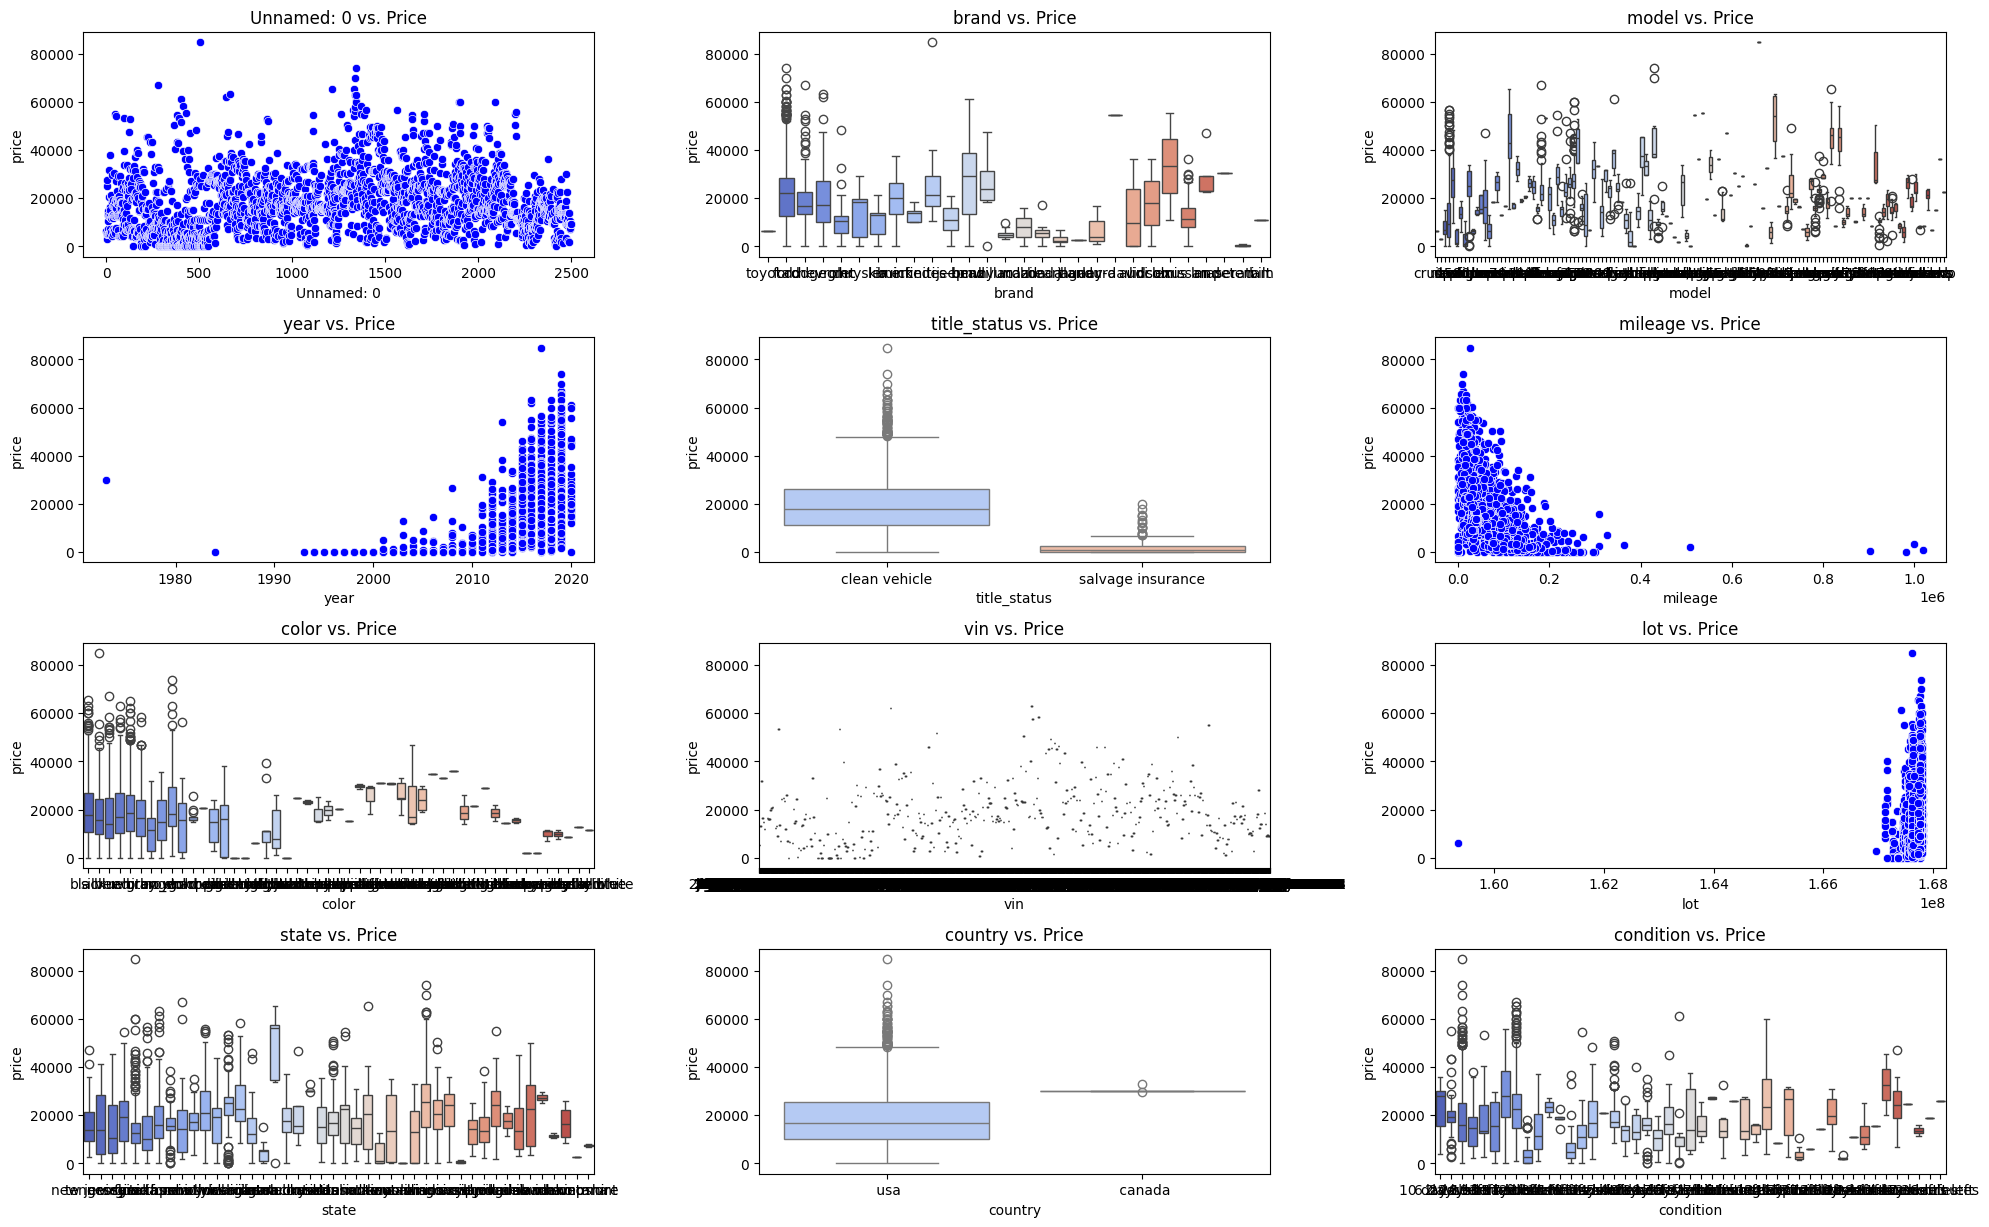

In [31]:
#Визначення числових і категорійних колонок, окрім цільової змінної "price"
features = data.columns.drop('price')

#Побудова boxplot-ів для всіх ознак відносно цільової змінної "price"
plt.figure(figsize=(20, 15))
for i, col in enumerate(features, 1):
    plt.subplot((len(features) // 3) + 1, 3, i)
    if data[col].dtype == 'object':  #Якщо ознака є категорійною
        sns.boxplot(x=data[col], y=data['price'], palette='coolwarm')
    else:  #Якщо ознака є числовою
        sns.scatterplot(x=data[col], y=data['price'], color='blue')
    plt.title(f'{col} vs. Price')

plt.tight_layout()
plt.show()


In [32]:
#4) Нормалізувати дані

#Вибір трьох основних ознак та цільової змінної
selected_features = ['year', 'condition', 'mileage']

# Конвертація "condition" до числових значень, якщо це потрібно
data['condition'] = data['condition'].astype('category').cat.codes

# Поділ цільової змінної "price" на категорії (low, medium, high) на основі квартилів
data['price_category'] = pd.qcut(data['price'], q=3, labels=['low', 'medium', 'high'])

#Нормалізація числових ознак
scaler = MinMaxScaler()
X = data[selected_features]
X[['year', 'mileage']] = scaler.fit_transform(X[['year', 'mileage']])

# 6. Розділення даних на X (ознаки) та y (цільова змінна)
y = data['price_category']

# 7. Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\denis\AppData\Local\Temp\ipykernel_22784\1494985078.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['year', 'mileage']] = scaler.fit_transform(X[['year', 'mileage']])


In [33]:
#5) Провести навчання наступних класифікаторів:

#kNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix for kNN:\n", confusion_matrix(y_test, y_pred_knn))

kNN Classification Report:
               precision    recall  f1-score   support

        high       0.60      0.73      0.66       177
         low       0.70      0.70      0.70       158
      medium       0.58      0.44      0.50       165

    accuracy                           0.62       500
   macro avg       0.62      0.62      0.62       500
weighted avg       0.62      0.62      0.62       500

Confusion Matrix for kNN:
 [[130  19  28]
 [ 23 110  25]
 [ 64  29  72]]


In [34]:
#Ініціалізація та навчання моделі Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

        high       0.56      0.58      0.57       177
         low       0.63      0.61      0.62       158
      medium       0.48      0.48      0.48       165

    accuracy                           0.56       500
   macro avg       0.56      0.56      0.56       500
weighted avg       0.56      0.56      0.56       500

Confusion Matrix for Decision Tree:
 [[102  23  52]
 [ 28  96  34]
 [ 51  34  80]]


In [35]:
#Ініціалізація та навчання моделі SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

        high       0.49      0.53      0.51       177
         low       0.39      0.59      0.47       158
      medium       0.38      0.16      0.23       165

    accuracy                           0.43       500
   macro avg       0.42      0.43      0.40       500
weighted avg       0.42      0.43      0.40       500

Confusion Matrix for SVM:
 [[93 61 23]
 [44 93 21]
 [53 85 27]]


In [36]:
#Ініціалізація та навчання моделі Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

        high       0.62      0.60      0.61       177
         low       0.66      0.68      0.67       158
      medium       0.52      0.52      0.52       165

    accuracy                           0.60       500
   macro avg       0.60      0.60      0.60       500
weighted avg       0.60      0.60      0.60       500

Confusion Matrix for Random Forest:
 [[106  27  44]
 [ 16 107  35]
 [ 50  29  86]]


In [37]:
#Ініціалізація та навчання моделі AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))
print("Confusion Matrix for AdaBoost:\n", confusion_matrix(y_test, y_pred_ada))

AdaBoost Classification Report:
               precision    recall  f1-score   support

        high       0.61      0.63      0.62       177
         low       0.65      0.65      0.65       158
      medium       0.53      0.52      0.53       165

    accuracy                           0.60       500
   macro avg       0.60      0.60      0.60       500
weighted avg       0.60      0.60      0.60       500

Confusion Matrix for AdaBoost:
 [[111  23  43]
 [ 23 102  33]
 [ 47  32  86]]


In [38]:
#Оптимальне значення k для kNN за допомогою GridSearchCV

#Параметри для GridSearchCV
param_grid_knn = {'n_neighbors': range(1, 21)}

#Ініціалізація GridSearchCV для kNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

#Отримання оптимального параметра k
best_k = grid_search_knn.best_params_['n_neighbors']
print(f"Оптимальне значення k для kNN: {best_k}")

#Навчання kNN з оптимальним значенням k
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train, y_train)

#Прогнозування та оцінка результатів
y_pred_knn_optimized = knn_optimized.predict(X_test)
print("Optimized kNN Classification Report:\n", classification_report(y_test, y_pred_knn_optimized))
print("Confusion Matrix for Optimized kNN:\n", confusion_matrix(y_test, y_pred_knn_optimized))

Оптимальне значення k для kNN: 7
Optimized kNN Classification Report:
               precision    recall  f1-score   support

        high       0.61      0.74      0.67       177
         low       0.67      0.70      0.68       158
      medium       0.60      0.44      0.50       165

    accuracy                           0.63       500
   macro avg       0.63      0.62      0.62       500
weighted avg       0.62      0.63      0.62       500

Confusion Matrix for Optimized kNN:
 [[131  22  24]
 [ 23 110  25]
 [ 61  32  72]]


In [39]:
#Підбір параметрів для SVM за допомогою GridSearchCV

#Параметри для GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

#Ініціалізація GridSearchCV для SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

#Отримання оптимальних параметрів для SVM
best_params_svm = grid_search_svm.best_params_
print(f"Оптимальні параметри для SVM: C={best_params_svm['C']}, gamma={best_params_svm['gamma']}")

#Навчання SVM з оптимальними параметрами
svm_optimized = SVC(C=best_params_svm['C'], gamma=best_params_svm['gamma'])
svm_optimized.fit(X_train, y_train)

#Прогнозування та оцінка результатів
y_pred_svm_optimized = svm_optimized.predict(X_test)
print("Optimized SVM Classification Report:\n", classification_report(y_test, y_pred_svm_optimized))
print("Confusion Matrix for Optimized SVM:\n", confusion_matrix(y_test, y_pred_svm_optimized))


Оптимальні параметри для SVM: C=100, gamma=1
Optimized SVM Classification Report:
               precision    recall  f1-score   support

        high       0.57      0.67      0.62       177
         low       0.67      0.66      0.67       158
      medium       0.52      0.44      0.48       165

    accuracy                           0.59       500
   macro avg       0.59      0.59      0.59       500
weighted avg       0.59      0.59      0.59       500

Confusion Matrix for Optimized SVM:
 [[118  18  41]
 [ 28 105  25]
 [ 60  33  72]]


In [40]:
#Обчислення точності для всіх моделей
accuracy_knn = knn_optimized.score(X_test, y_test)
accuracy_dt = dt.score(X_test, y_test)
accuracy_svm = svm_optimized.score(X_test, y_test)
accuracy_rf = rf.score(X_test, y_test)
accuracy_ada = ada.score(X_test, y_test)

#Виведення результатів
print(f"Точність kNN (оптимізований): {accuracy_knn:.2f}")
print(f"Точність Decision Tree: {accuracy_dt:.2f}")
print(f"Точність SVM (оптимізований): {accuracy_svm:.2f}")
print(f"Точність Random Forest: {accuracy_rf:.2f}")
print(f"Точність AdaBoost: {accuracy_ada:.2f}")

Точність kNN (оптимізований): 0.63
Точність Decision Tree: 0.56
Точність SVM (оптимізований): 0.59
Точність Random Forest: 0.60
Точність AdaBoost: 0.60


In [41]:
# Функція для відображення метрик для кожної моделі
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))

# Відображення метрик для оптимізованої моделі kNN
evaluate_model(y_test, y_pred_knn_optimized, "Optimized kNN")

# Відображення метрик для Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Відображення метрик для оптимізованої моделі SVM
evaluate_model(y_test, y_pred_svm_optimized, "Optimized SVM")

# Відображення метрик для Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Відображення метрик для AdaBoost
evaluate_model(y_test, y_pred_ada, "AdaBoost")


Optimized kNN Classification Report:
               precision    recall  f1-score   support

        high       0.61      0.74      0.67       177
         low       0.67      0.70      0.68       158
      medium       0.60      0.44      0.50       165

    accuracy                           0.63       500
   macro avg       0.63      0.62      0.62       500
weighted avg       0.62      0.63      0.62       500

Confusion Matrix for Optimized kNN:
 [[131  22  24]
 [ 23 110  25]
 [ 61  32  72]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

        high       0.56      0.58      0.57       177
         low       0.63      0.61      0.62       158
      medium       0.48      0.48      0.48       165

    accuracy                           0.56       500
   macro avg       0.56      0.56      0.56       500
weighted avg       0.56      0.56      0.56       500

Confusion Matrix for Decision Tree:
 [[102  23  52]
 [ 28  96  34]
 [ 51  34  8